In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 8s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[9]

'truck'

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

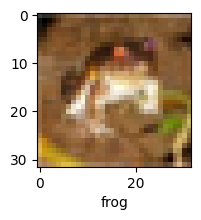

In [10]:
plot_sample(X_train, y_train, 0)

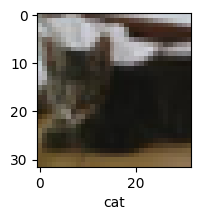

In [11]:
plot_sample(X_train, y_train, 9)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.8163 - accuracy: 0.3520
Epoch 2/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6260 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5428 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4847 - accuracy: 0.4747
Epoch 5/5
1563/1563 [==============================] - 116s 75ms/step - loss: 1.4340 - accuracy: 0.4965


In [14]:
from warnings import filters
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4701 - accuracy: 0.4678
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1138 - accuracy: 0.6074
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9855 - accuracy: 0.6558
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8999 - accuracy: 0.6875
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8305 - accuracy: 0.7114
Epoch 6/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7719 - accuracy: 0.7309
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7243 - accuracy: 0.7449
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6764 - accuracy: 0.7626
Epoch 9/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.6371 - accuracy: 0.7753
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [17]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9343 - accuracy: 0.6950


[0.9342629909515381, 0.6949999928474426]

In [18]:
y_test = y_test.reshape(-1,)

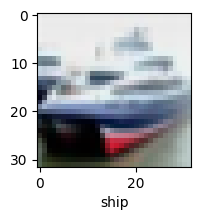

In [19]:
plot_sample(X_test, y_test, 1)

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.5989156e-02, 7.2454051e-05, 7.1572117e-03, 7.2879422e-01,
        2.0010356e-04, 1.8521793e-01, 4.4591207e-04, 3.4548428e-02,
        1.2923491e-02, 1.4651172e-02],
       [6.8081445e-03, 1.7238113e-03, 5.8311748e-06, 9.9751458e-07,
        7.9008949e-08, 9.8519992e-10, 1.2231282e-08, 5.1362626e-11,
        9.9144018e-01, 2.0930349e-05],
       [3.5586704e-02, 4.9856167e-02, 2.5230276e-03, 9.8059112e-03,
        4.8945972e-04, 2.5275658e-04, 6.0095126e-04, 1.7634335e-04,
        8.7762088e-01, 2.3087729e-02],
       [8.1749886e-01, 2.5399006e-03, 3.3195008e-02, 4.0346431e-03,
        5.2707624e-02, 2.7609391e-05, 3.6886145e-06, 8.4367421e-05,
        8.9791253e-02, 1.1708298e-04],
       [3.6996107e-07, 1.2335330e-06, 1.6153960e-03, 3.5315819e-02,
        7.3344511e-01, 9.9508464e-04, 2.2858298e-01, 4.2342974e-05,
        1.3594599e-06, 3.3326279e-07]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

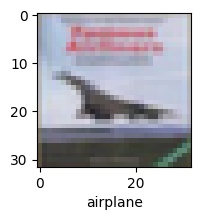

In [23]:
plot_sample(X_test, y_test, 3)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_classes))

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.79      0.82      0.81      1000
           2       0.64      0.57      0.60      1000
           3       0.51      0.50      0.50      1000
           4       0.70      0.58      0.64      1000
           5       0.58      0.60      0.59      1000
           6       0.77      0.78      0.78      1000
           7       0.68      0.78      0.73      1000
           8       0.74      0.84      0.79      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

